Saving Table 21.1-1.txt to Table 21.1-1.txt


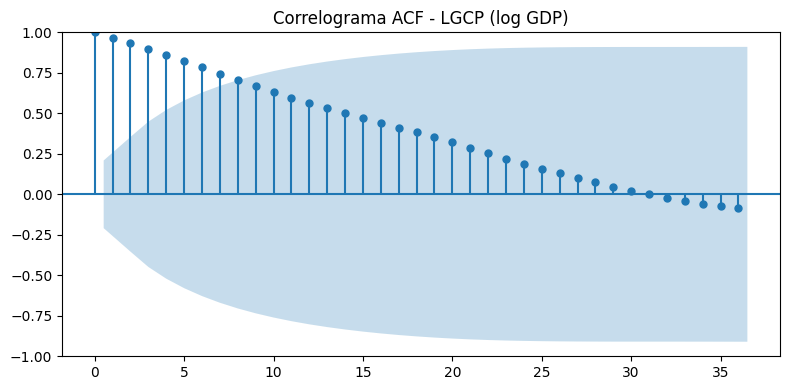


--- Prueba Dickey-Fuller ADF para LGCP (log GDP) ---
Estadístico ADF: 0.1182
Valor-p: 0.9673
¿Estacionaria?: No

Diferenciando la serie: LGCP (log GDP)


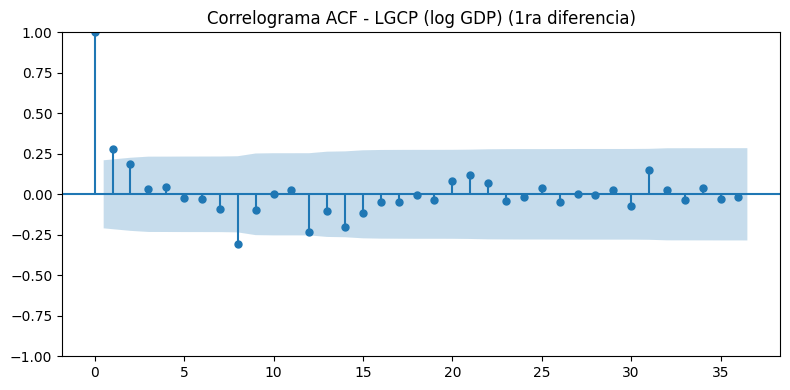


--- Prueba Dickey-Fuller ADF para LGCP (log GDP) (1ra diferencia) ---
Estadístico ADF: -3.8214
Valor-p: 0.0027
¿Estacionaria?: Sí

--- Estimando ARIMA para LGCP (log GDP) (d=1) ---
Mejor ARIMA(1, 1, 1) con AIC = -546.93
                               SARIMAX Results                                
Dep. Variable:                   LGCP   No. Observations:                   87
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 276.463
Date:                Fri, 13 Jun 2025   AIC                           -546.925
Time:                        17:18:09   BIC                           -539.562
Sample:                             0   HQIC                          -543.962
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

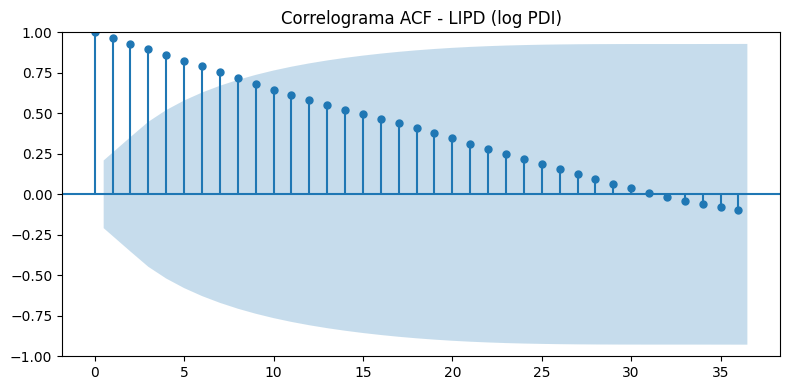


--- Prueba Dickey-Fuller ADF para LIPD (log PDI) ---
Estadístico ADF: -1.4407
Valor-p: 0.5626
¿Estacionaria?: No

Diferenciando la serie: LIPD (log PDI)


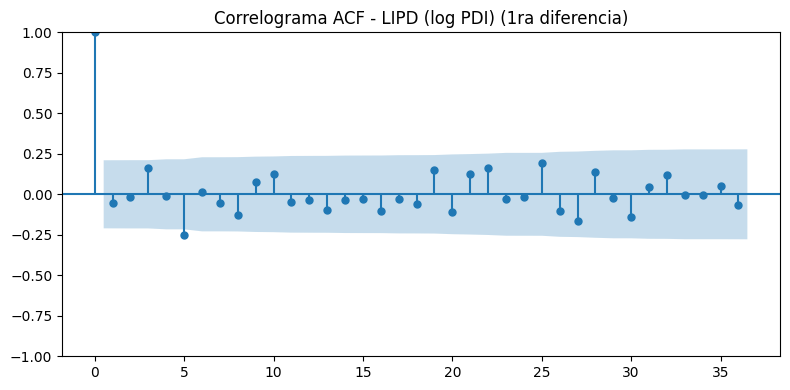


--- Prueba Dickey-Fuller ADF para LIPD (log PDI) (1ra diferencia) ---
Estadístico ADF: -4.6692
Valor-p: 0.0001
¿Estacionaria?: Sí

--- Estimando ARIMA para LIPD (log PDI) (d=1) ---
Mejor ARIMA(0, 1, 1) con AIC = -530.01
                               SARIMAX Results                                
Dep. Variable:                   LIPD   No. Observations:                   87
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 267.007
Date:                Fri, 13 Jun 2025   AIC                           -530.014
Time:                        17:18:12   BIC                           -525.105
Sample:                             0   HQIC                          -528.039
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

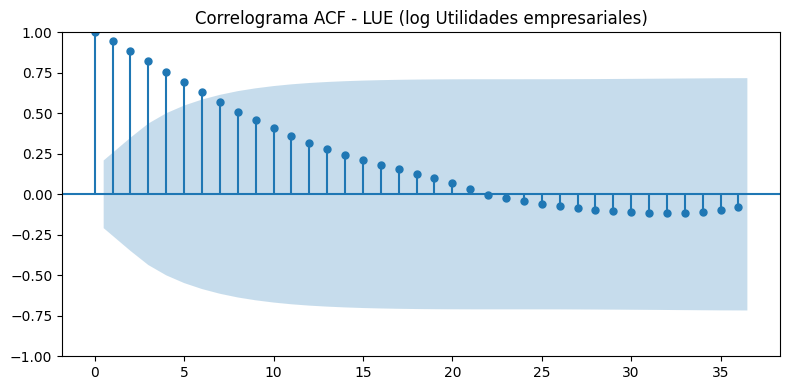


--- Prueba Dickey-Fuller ADF para LUE (log Utilidades empresariales) ---
Estadístico ADF: -2.2429
Valor-p: 0.1910
¿Estacionaria?: No

Diferenciando la serie: LUE (log Utilidades empresariales)


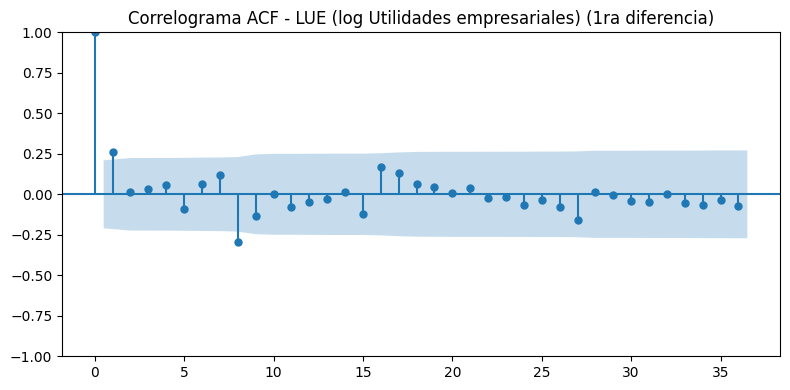


--- Prueba Dickey-Fuller ADF para LUE (log Utilidades empresariales) (1ra diferencia) ---
Estadístico ADF: -3.0736
Valor-p: 0.0286
¿Estacionaria?: Sí

--- Estimando ARIMA para LUE (log Utilidades empresariales) (d=1) ---
Mejor ARIMA(2, 1, 3) con AIC = -212.65
                               SARIMAX Results                                
Dep. Variable:                    LUE   No. Observations:                   87
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 112.325
Date:                Fri, 13 Jun 2025   AIC                           -212.650
Time:                        17:18:15   BIC                           -197.924
Sample:                             0   HQIC                          -206.723
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

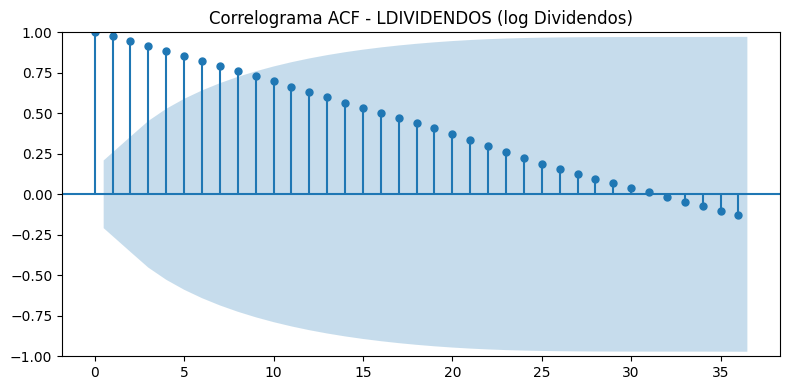


--- Prueba Dickey-Fuller ADF para LDIVIDENDOS (log Dividendos) ---
Estadístico ADF: -0.7791
Valor-p: 0.8252
¿Estacionaria?: No

Diferenciando la serie: LDIVIDENDOS (log Dividendos)


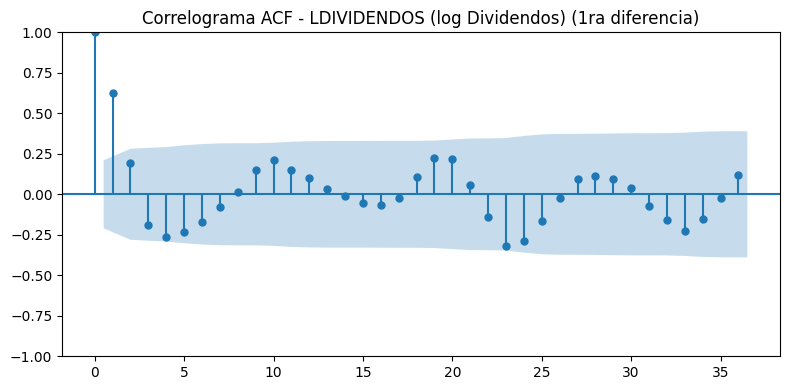


--- Prueba Dickey-Fuller ADF para LDIVIDENDOS (log Dividendos) (1ra diferencia) ---
Estadístico ADF: -6.2538
Valor-p: 0.0000
¿Estacionaria?: Sí

--- Estimando ARIMA para LDIVIDENDOS (log Dividendos) (d=1) ---
Mejor ARIMA(0, 1, 3) con AIC = -446.58
                               SARIMAX Results                                
Dep. Variable:            LDIVIDENDOS   No. Observations:                   87
Model:                 ARIMA(0, 1, 3)   Log Likelihood                 227.291
Date:                Fri, 13 Jun 2025   AIC                           -446.581
Time:                        17:18:17   BIC                           -436.764
Sample:                             0   HQIC                          -442.630
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

In [1]:
# Paso 1: Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from io import StringIO
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

# Paso 2: Subir archivo
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Paso 3: Leer líneas con datos numéricos desde 1970
with open(file_name, 'r') as f:
    lines = f.readlines()

data_start = [i for i, line in enumerate(lines) if line.strip().startswith("1970")][0]
data_lines = lines[data_start:]
columns = ['YEAR', 'GDP', 'PDI', 'PCE', 'PROFITS', 'DIVIDENDS']
data_str = ''.join(data_lines)
df = pd.read_csv(StringIO(data_str), delim_whitespace=True, names=columns)

# Paso 4: Calcular logaritmos
df['LGCP'] = np.log(df['GDP'])
df['LIPD'] = np.log(df['PDI'])
df['LUE'] = np.log(df['PROFITS'])
df['LDIVIDENDOS'] = np.log(df['DIVIDENDS'])

# Paso 5: Prueba ADF y graficar ACF
def test_adf(series, name):
    result = adfuller(series)
    print(f'\n--- Prueba Dickey-Fuller ADF para {name} ---')
    print(f'Estadístico ADF: {result[0]:.4f}')
    print(f'Valor-p: {result[1]:.4f}')
    print('¿Estacionaria?:', 'Sí' if result[1] < 0.05 else 'No')
    return result[1] >= 0.05  # Retorna True si NO es estacionaria

def plot_acf_series(series, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    sm.graphics.tsa.plot_acf(series, lags=36, ax=ax)
    ax.set_title(f'Correlograma ACF - {title}')
    plt.tight_layout()
    plt.show()

# Paso 6: Estimación ARIMA
def fit_arima(series, name, d=0):
    print(f'\n--- Estimando ARIMA para {name} ---')
    # Prueba diferentes combinaciones p y q
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in range(4):
        for q in range(4):
            try:
                model = ARIMA(series, order=(p, d, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                continue
    if best_model:
        print(f'Mejor ARIMA{best_order} con AIC = {best_aic:.2f}')
        print(best_model.summary())
    else:
        print('No fue posible ajustar un modelo ARIMA adecuado.')

# Paso 7: Análisis para cada serie
series_dict = {
    'LGCP (log GDP)': df['LGCP'],
    'LIPD (log PDI)': df['LIPD'],
    'LUE (log Utilidades empresariales)': df['LUE'],
    'LDIVIDENDOS (log Dividendos)': df['LDIVIDENDOS']
}

for name, series in series_dict.items():
    plot_acf_series(series, name)
    needs_diff = test_adf(series, name)
    if needs_diff:
        diff_series = series.diff().dropna()
        print(f'\nDiferenciando la serie: {name}')
        plot_acf_series(diff_series, name + ' (1ra diferencia)')
        test_adf(diff_series, name + ' (1ra diferencia)')
        fit_arima(diff_series, name + ' (d=1)', d=1)
    else:
        fit_arima(series, name + ' (d=0)', d=0)


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls


 drive	 sample_data  'Table 21.1-1.txt'


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
!jupyter nbconvert --to html "Ejercicio_Econometrics_Gujarati.ipynb"

[NbConvertApp] Converting notebook Ejercicio_Econometrics_Gujarati.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 431661 bytes to Ejercicio_Econometrics_Gujarati.html


In [ ]:
from google.colab import files
files.download("Ejercicio_Econometrics_Gujarati.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>